# Emission Spectrum 

This notebook shows the calculations to determine the emission spectrum of hydrogen. 

These values are compared with the balmer series to see how many standard deviations from the mean the true value is. 

# Import libraries 

In [2]:
import numpy as np 

import matplotlib.pyplot as plt 

# Define diffraction grating and its uncertainty 

In [3]:
d = .0033/1000

del_d = .00005/1000

del_d/d

0.015151515151515152

# Define wavelength equation and error propagation

In [4]:
def wavelength(theta, d):
    wavelength = d*np.sin(theta)
    return wavelength

def uncertainty_wavelength(theta, del_theta, d, del_d):
    return np.sqrt((d*np.cos(theta)* del_theta)**2 + (np.sin(theta) * del_d)**2)

## Create arrays for wavelength 

Remember that np.sin and np.cos accept an angle in radians only. Convert the angle array into radians 

In [5]:
blue = 95.1833

aqua = 96.05

yellow = 97.655

red = 98.99

ref = 87.75


angle_array = np.array([blue - ref,aqua - ref, yellow - ref, red - ref]) * (np.pi/180)

del_theta = .00014

wavelength_array = wavelength(angle_array, d)

uncertainty_wavelength = uncertainty_wavelength(angle_array, del_theta, d, del_d)



In [6]:
angle_array

array([0.12973556, 0.14486233, 0.17287486, 0.19617501])

In [7]:
wavelength_array = wavelength_array * (1*10**9)

uncertainty_wavelength = uncertainty_wavelength * (1*10**9)

del_theta_array = np.ones(4)*del_theta

In [8]:
wavelength_array = np.round(wavelength_array)

wavelength_array

array([427., 476., 568., 643.])

In [9]:
uncertainty_wavelength = np.round(uncertainty_wavelength)

uncertainty_wavelength

array([ 6.,  7.,  9., 10.])

## Summarize the results 

Print out the wavelengths as well as uncertainties. Remember appropriate rules for error propagation

In [10]:
color = ["blue", "aqua", "yellow", "red"]
count = 0
for wave, unc in zip(wavelength_array, uncertainty_wavelength):
    print(" The wavelength for " +  color[count] + " is " + str(np.round(wave)) + " +/- " +  str(np.round(unc)) + " nm")
    
    count += 1

 The wavelength for blue is 427.0 +/- 6.0 nm
 The wavelength for aqua is 476.0 +/- 7.0 nm
 The wavelength for yellow is 568.0 +/- 9.0 nm
 The wavelength for red is 643.0 +/- 10.0 nm


## Plot the results 

Here the experimental results and error bars are plotted 

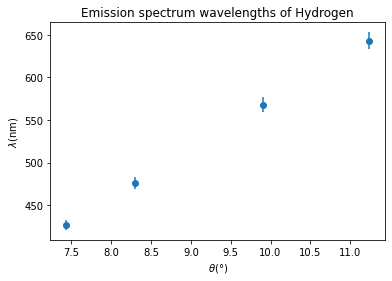

In [26]:
plt.figure()

plt.scatter(angle_array * (180/np.pi), wavelength_array)

plt.errorbar(angle_array * (180/np.pi),  wavelength_array, xerr = del_theta_array * (180/np.pi), yerr = uncertainty_wavelength, ls = 'none')

plt.xlabel(r"$\theta$" + "(\N{DEGREE SIGN})")

plt.ylabel(r"$\lambda$" + "(nm)")

plt.title("Emission spectrum wavelengths of Hydrogen")

plt.savefig("ExperimentalWavelength.png")

# Compare with true values 

Need to graphically see how much discrepancy there is between experimental and true values 

Need accepted values for wavelengths of emission spectra for hydrogen 

This is the balmer series for emission lines and can be found at 

https://en.wikipedia.org/wiki/Balmer_series#:~:text=The%20visible%20spectrum%20of%20light,quantum%20number%20n%20equals%202.

In [13]:
####################################
#### True values for Balmer Series##
####################################

# Wavelengths are in nm 

blue = 434.04

aqua= 474.04

yellow = 580

red = 656.27

accepted = np.array([blue, aqua, yellow, red])


#Solve for theta in the accepted array. arcsin requires specific arguments

accepted2 = np.array([blue, aqua, yellow, red])/(1*10**9)

angle_true = np.arcsin(accepted2/d)



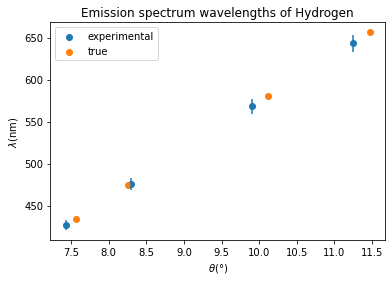

In [25]:
plt.figure()

plt.scatter(angle_array * (180/np.pi), wavelength_array)

plt.errorbar(angle_array * (180/np.pi),  wavelength_array, xerr = del_theta_array * (180/np.pi), yerr = uncertainty_wavelength, ls = 'none')

plt.scatter(angle_true * (180/np.pi), accepted)

plt.xlabel(r"$\theta$" + "(\N{DEGREE SIGN})")

plt.ylabel(r"$\lambda$" + "(nm)")

plt.title("Emission spectrum wavelengths of Hydrogen")

plt.legend(["experimental", "true"])

plt.savefig("ExperimentalVsTrueWavelength.png")

# Discrepancies and standard deviations 

Need to see how experimental values differ from true values in terms of standard deviations.


In [31]:
discrepancy = np.abs(wavelength_array - accepted)

discrepancy

array([ 7.04,  1.96, 12.  , 13.27])

In [32]:
std_from_mean = discrepancy/uncertainty_wavelength
std_from_mean

array([1.17333333, 0.28      , 1.33333333, 1.327     ])

All measurements are within two standard deviations of the mean. It seems like some colors were misidentified. Violet was really blue and blue was really aqua. This explains why initially the first two wavelengths seemed so different. They were incorrectly classified. 